# Data Cleansing

#### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from scipy.stats import ttest_ind

from scipy.stats.mstats import winsorize


#### Load the dataset

In [2]:
# Assuming your dataset is in a CSV file format
df = pd.read_excel('Dataset.xlsx')

## Understanding the Dataset

In [3]:
# View the first few rows of the dataset
df.head()

,Product,ProductGroup,ProductType,Agency,WorkflowStatus,Indexation,NoOfLives,PropDate,CommDateProvided,PaymentFreq,...,RenewalSacrificeType,CommissionSacrificePercentage,CommissionTerms,Discount,BonusCommission,BonusCommissionPercentage,FreeCover,SeriousIllnessType,SignedDecReceived,PolicyIssued
0,7,4,4,775,4,1,1,2017-01-02,0,2,...,3,0.00,1,0,0,0.0,0,2,0,1
1,6,4,3,811,4,1,1,2017-01-03,0,2,...,3,0.00,1,0,1,25.0,0,2,0,1
2,3,2,3,776,4,0,2,2017-01-03,0,2,...,3,0.00,1,0,0,0.0,0,2,0,1
3,3,2,3,44,4,0,2,2017-01-03,0,2,...,3,39.99,1,0,0,0.0,0,2,0,1
4,3,2,3,463,4,0,1,2017-01-03,0,2,...,3,0.00,1,0,1,10.0,0,2,0,1


In [4]:
# Get an overview of the dataset, including column names, non-null counts, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157263 entries, 0 to 157262
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Product                        157263 non-null  int64         
 1   ProductGroup                   157263 non-null  int64         
 2   ProductType                    157263 non-null  int64         
 3   Agency                         157263 non-null  int64         
 4   WorkflowStatus                 157263 non-null  int64         
 5   Indexation                     157263 non-null  int64         
 6   NoOfLives                      157263 non-null  int64         
 7   PropDate                       157263 non-null  datetime64[ns]
 8   CommDateProvided               157263 non-null  int64         
 9   PaymentFreq                    157263 non-null  int64         
 10  UWDecision                     157263 non-null  int64         
 11  

In [5]:
# Get the list of columns to convert to categorical
categorical_columns = df.select_dtypes(include='int64').columns.tolist()

# Convert the selected columns to categorical
df[categorical_columns] = df[categorical_columns].astype('category')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157263 entries, 0 to 157262
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Product                        157263 non-null  category      
 1   ProductGroup                   157263 non-null  category      
 2   ProductType                    157263 non-null  category      
 3   Agency                         157263 non-null  category      
 4   WorkflowStatus                 157263 non-null  category      
 5   Indexation                     157263 non-null  category      
 6   NoOfLives                      157263 non-null  category      
 7   PropDate                       157263 non-null  datetime64[ns]
 8   CommDateProvided               157263 non-null  category      
 9   PaymentFreq                    157263 non-null  category      
 10  UWDecision                     157263 non-null  category      
 11  

In [7]:
# Get summary statistics of numerical variables
df.describe()

,CommissionSacrificePercentage,BonusCommissionPercentage
count,157263.000000,157263.000000
mean,13.979276,9.886184
std,38.631017,12.017553
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,2.400000
75%,0.000000,20.000000
max,199.900000,57.500000


## Handling Missing Values

#### Identify missing values

In [8]:
# Count the number of missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

Product                          0
ProductGroup                     0
ProductType                      0
Agency                           0
WorkflowStatus                   0
Indexation                       0
NoOfLives                        0
PropDate                         0
CommDateProvided                 0
PaymentFreq                      0
UWDecision                       0
ComissionSacrifice               0
CommissionSacrificeType          0
RenewalSacrificeType             0
CommissionSacrificePercentage    0
CommissionTerms                  0
Discount                         0
BonusCommission                  0
BonusCommissionPercentage        0
FreeCover                        0
SeriousIllnessType               0
SignedDecReceived                0
PolicyIssued                     0
dtype: int64


No missing values identified

## Handling Outliers

#### Identify outliers

Values with a Z-score greater than 3 are considered outliers.

In [9]:
numeric_data = df.select_dtypes(include=[np.number])

# Define a function to detect outliers using a z-score threshold of 3
def detect_outliers_zscore(numeric_data, threshold=3):
    z_scores = np.abs((numeric_data - numeric_data.mean()) / numeric_data.std())
    outliers = numeric_data[z_scores > threshold]
    return outliers

# Apply the function to each column of DataFrame
outliers = numeric_data.apply(detect_outliers_zscore)

In [10]:
outliers

,CommissionSacrificePercentage,BonusCommissionPercentage
17,163.71,NaN
19,145.60,NaN
80,149.81,NaN
161,135.00,NaN
175,162.00,NaN
...,...,...
157171,137.20,NaN
157172,137.20,NaN
157197,138.20,NaN
157244,137.40,NaN


Visualise number of ouliers in each numeric column

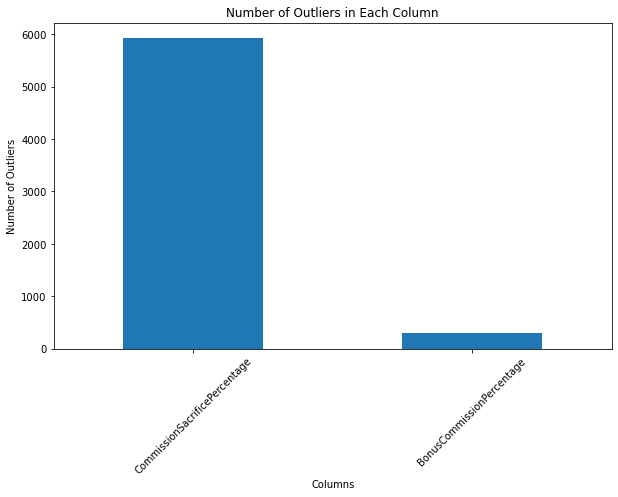

In [11]:
# Count the number of outliers in each column
outlier_counts = outliers.count()

# Create a bar plot of outlier counts
plt.figure(figsize=(10, 6))
outlier_counts.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers in Each Column')
plt.xticks(rotation=45)
plt.show()

In [12]:
# Create a new DataFrame from outlier_counts
outlier_table = pd.DataFrame({'Column': outlier_counts.index, 'Outlier Count': outlier_counts.values})

# Display the table
print(outlier_table)

                          Column  Outlier Count
0  CommissionSacrificePercentage           5927
1      BonusCommissionPercentage            308


#### Impact of outliers

Descriptive statistics for  data both with and without the outliers

Calculate basic descriptive statistics data both with and without the outliers in order to assess impact of the outliers

In [13]:
# Create two datasets (one with outliers included and another with outliers removed)
dataset_with_outliers = df.copy()  # Dataset with outliers included
dataset_without_outliers = df[~df.isin(outliers)].dropna()  # Dataset with outliers removed

In [14]:
# Descriptive statistics for dataset with outliers
statistics_with_outliers = dataset_with_outliers.describe()

In [15]:
# Descriptive statistics for dataset without outliers
statistics_without_outliers = dataset_without_outliers.describe()

In [16]:
# Print and compare the statistics
print("With Outliers:")
print(statistics_with_outliers)

print("\nWithout Outliers:")
print(statistics_without_outliers)

With Outliers:
       CommissionSacrificePercentage  BonusCommissionPercentage
count                  157263.000000              157263.000000
mean                       13.979276                   9.886184
std                        38.631017                  12.017553
min                         0.000000                   0.000000
25%                         0.000000                   0.000000
50%                         0.000000                   2.400000
75%                         0.000000                  20.000000
max                       199.900000                  57.500000

Without Outliers:
       CommissionSacrificePercentage  BonusCommissionPercentage
count                  151030.000000              151030.000000
mean                        8.801483                   9.431934
std                        28.827303                  11.682418
min                         0.000000                   0.000000
25%                         0.000000                   0.000000
50%   

The presence of outliers in the data has influenced the mean, standard deviation, and maximum values. The mean and maximum values are higher with outliers, reflecting the influence of extreme values. The standard deviation is larger with outliers, indicating a wider spread. However, after removing outliers, the mean, standard deviation, and maximum values decrease, suggesting a more accurate representation of the majority of data points.

#### Visualise impact of outliers

Box Plots

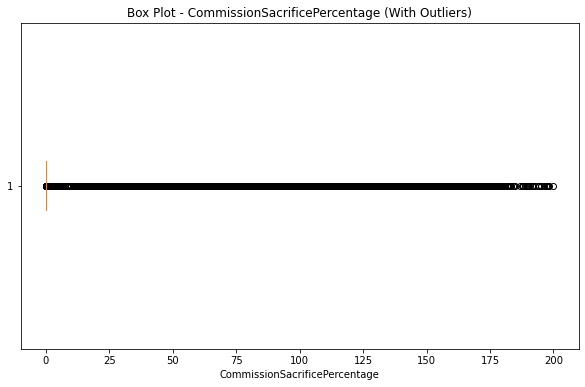

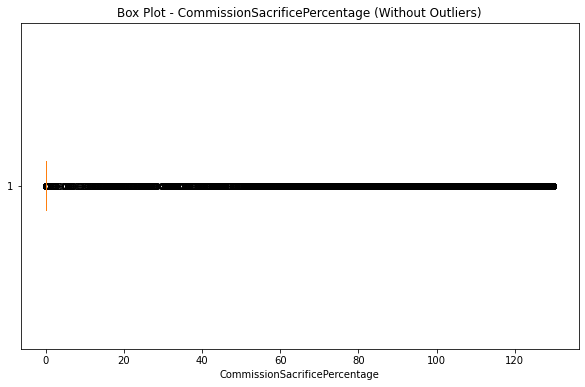

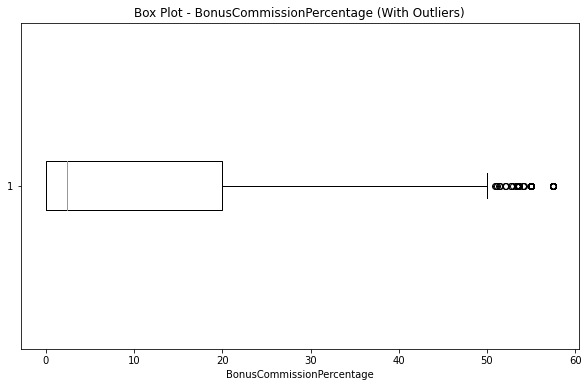

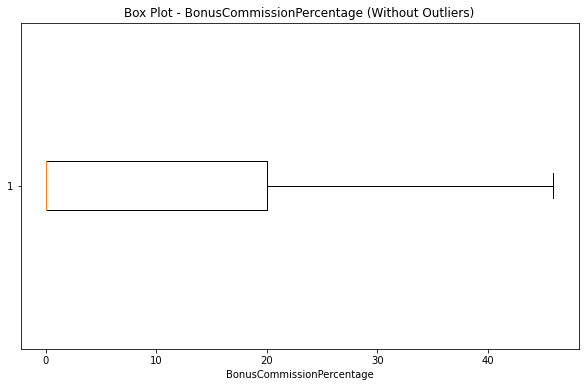

In [17]:
# Create a list of numeric column names
numeric_columns = df.select_dtypes(include='number').columns

# Loop over each numeric column and create box plots
for column in numeric_columns:
    # Box plot with outliers
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[column], vert=False)
    plt.title(f'Box Plot - {column} (With Outliers)')
    plt.xlabel(column)
    plt.show()

    # Box plot without outliers
    plt.figure(figsize=(10, 6))
    plt.boxplot(dataset_without_outliers[column], vert=False)
    plt.title(f'Box Plot - {column} (Without Outliers)')
    plt.xlabel(column)
    plt.show()

Histograms

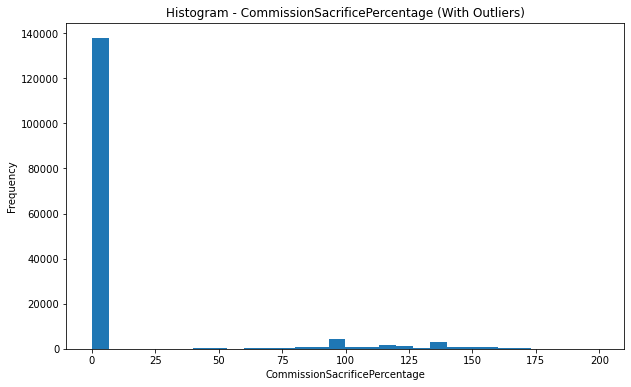

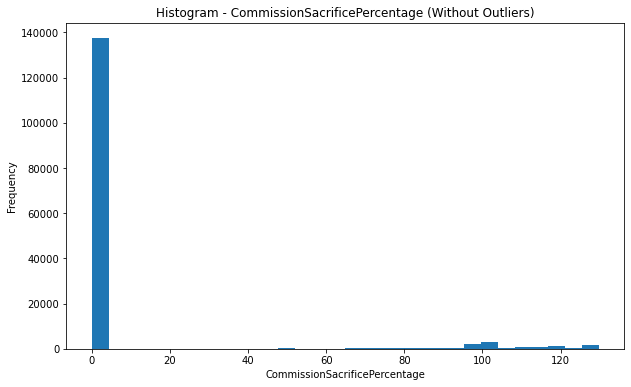

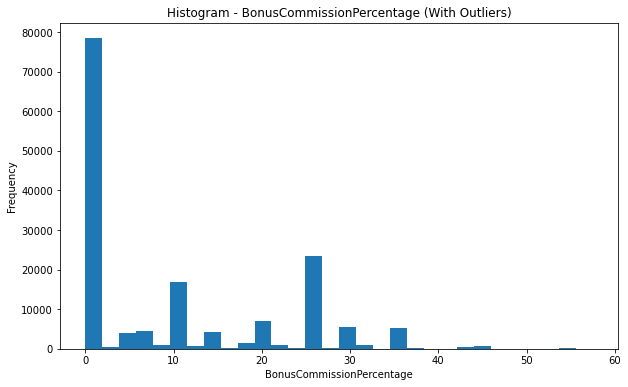

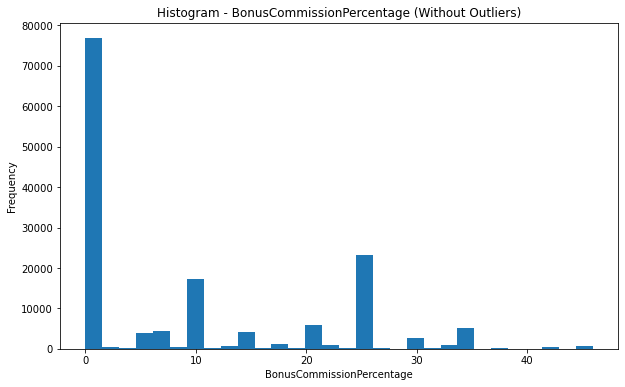

In [18]:
# Loop over each numeric column and create histograms
for column in numeric_columns:
    # Histogram with outliers
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=30)
    plt.title(f'Histogram - {column} (With Outliers)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    # Histogram without outliers
    plt.figure(figsize=(10, 6))
    plt.hist(dataset_without_outliers[column], bins=30)
    plt.title(f'Histogram - {column} (Without Outliers)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Scatter Plots

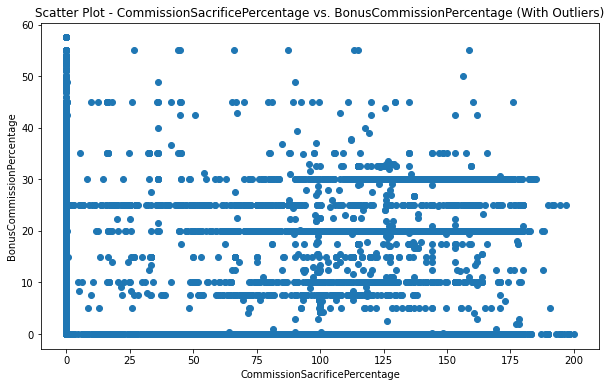

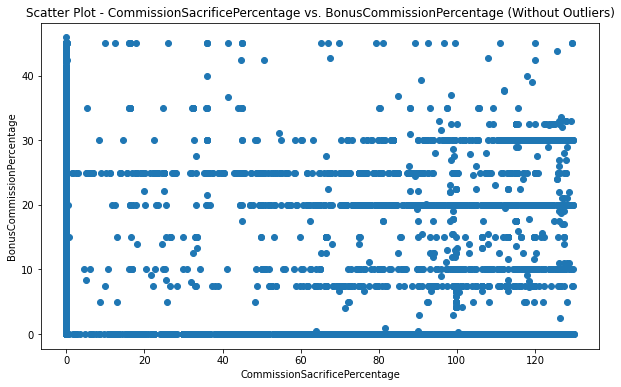

In [19]:
# Loop over each pair of numeric columns and create scatter plots
for i in range(len(numeric_columns)):
    for j in range(i + 1, len(numeric_columns)):
        # Scatter plot with outliers
        plt.figure(figsize=(10, 6))
        plt.scatter(df[numeric_columns[i]], df[numeric_columns[j]])
        plt.title(f'Scatter Plot - {numeric_columns[i]} vs. {numeric_columns[j]} (With Outliers)')
        plt.xlabel(numeric_columns[i])
        plt.ylabel(numeric_columns[j])
        plt.show()

        # Scatter plot without outliers
        plt.figure(figsize=(10, 6))
        plt.scatter(dataset_without_outliers[numeric_columns[i]], dataset_without_outliers[numeric_columns[j]])
        plt.title(f'Scatter Plot - {numeric_columns[i]} vs. {numeric_columns[j]} (Without Outliers)')
        plt.xlabel(numeric_columns[i])
        plt.ylabel(numeric_columns[j])
        plt.show()

Violin Plots

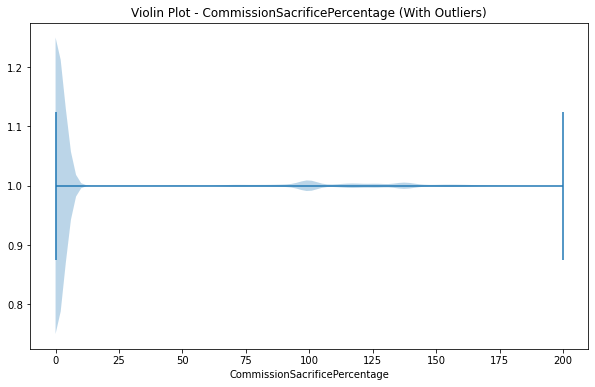

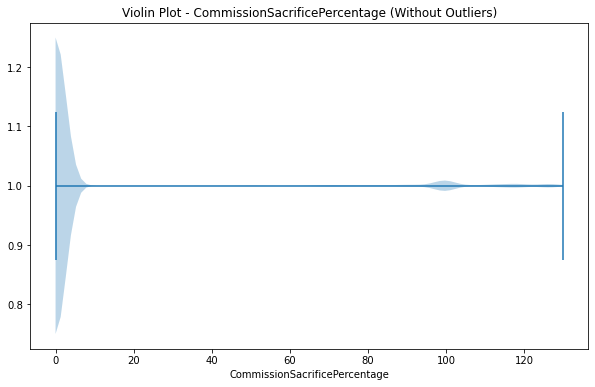

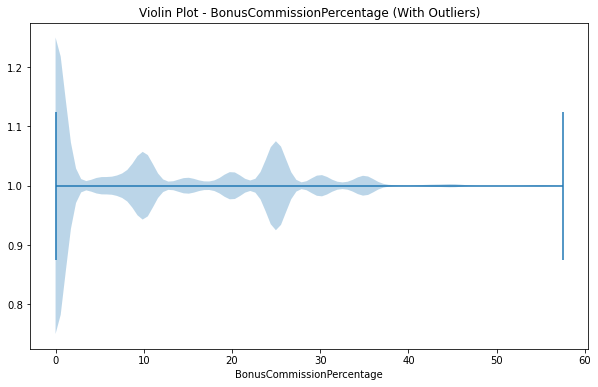

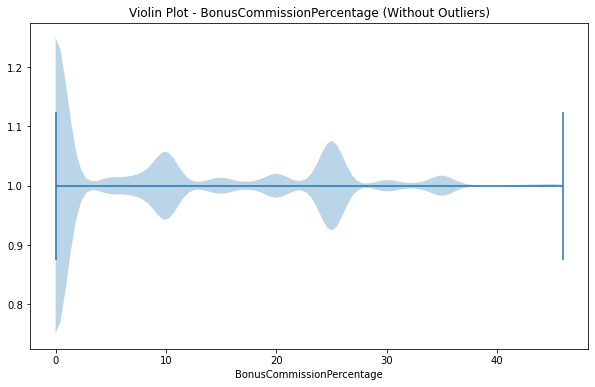

In [20]:
# Loop over each numeric column and create violin plots
for column in numeric_columns:
    # Violin plot with outliers
    plt.figure(figsize=(10, 6))
    plt.violinplot(df[column], vert=False)
    plt.title(f'Violin Plot - {column} (With Outliers)')
    plt.xlabel(column)
    plt.show()

    # Violin plot without outliers
    plt.figure(figsize=(10, 6))
    plt.violinplot(dataset_without_outliers[column], vert=False)
    plt.title(f'Violin Plot - {column} (Without Outliers)')
    plt.xlabel(column)
    plt.show()

Correlation Analysis

In [21]:
# Compute correlation matrix with outliers
correlation_matrix_with_outliers = df.corr(method='spearman')  # Using spearman over pearson as it is more robust with the presence of outliers

# Compute correlation matrix without outliers
correlation_matrix_without_outliers = dataset_without_outliers.corr(method='spearman')

# Compare the correlation matrices
correlation_diff = correlation_matrix_with_outliers - correlation_matrix_without_outliers

# Print correlation matrix with outliers
print("Correlation Matrix - With Outliers:")
print(correlation_matrix_with_outliers)

# Print correlation matrix without outliers
print("\nCorrelation Matrix - Without Outliers:")
print(correlation_matrix_without_outliers)

# Print the difference in correlation matrices
print("\nDifference in Correlation Matrices:")
print(correlation_diff)

Correlation Matrix - With Outliers:
                               CommissionSacrificePercentage  \
CommissionSacrificePercentage                       1.000000   
BonusCommissionPercentage                           0.104362   

                               BonusCommissionPercentage  
CommissionSacrificePercentage                   0.104362  
BonusCommissionPercentage                       1.000000  

Correlation Matrix - Without Outliers:
                               CommissionSacrificePercentage  \
CommissionSacrificePercentage                       1.000000   
BonusCommissionPercentage                           0.029852   

                               BonusCommissionPercentage  
CommissionSacrificePercentage                   0.029852  
BonusCommissionPercentage                       1.000000  

Difference in Correlation Matrices:
                               CommissionSacrificePercentage  \
CommissionSacrificePercentage                       0.000000   
BonusCommissionPerc

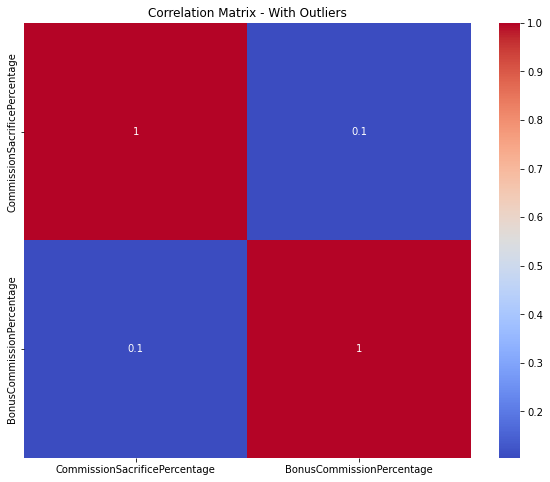

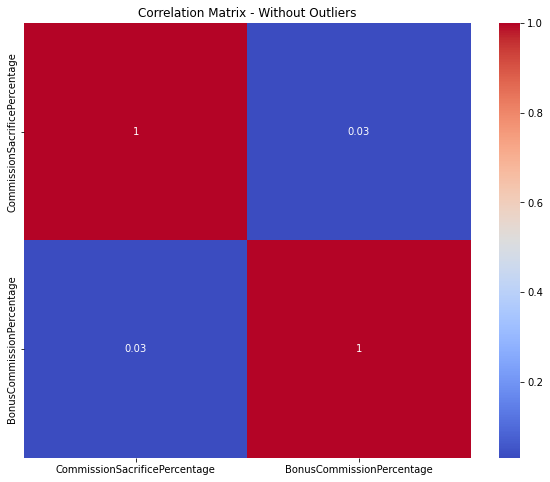

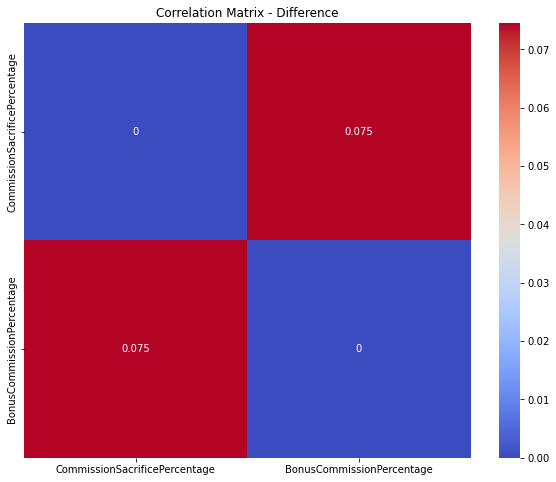

In [22]:
# Heatmap with outliers
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_with_outliers, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - With Outliers')
plt.show()

# Heatmap without outliers
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_without_outliers, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Without Outliers')
plt.show()

# Heatmap showing Difference in Correlation Matrices
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_diff, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Difference')
plt.show()

The presence of outliers has an impact on the correlation between 'CommissionSacrificePercentage' and 'BonusCommissionPercentage'. Removing the outliers reveals a weaker correlation, suggesting that the outliers were influencing the apparent relationship between the variables..

Pairwise scatterplots

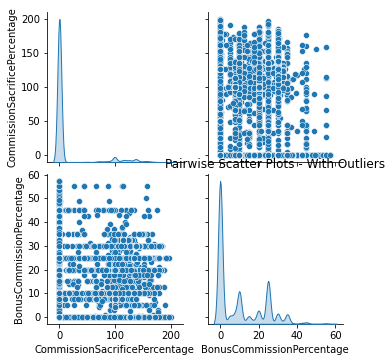

In [23]:
# Create a subset DataFrame with selected variables of interest
variables_of_interest = ['CommissionSacrificePercentage', 'BonusCommissionPercentage']
df_subset = df[variables_of_interest]

# Pairwise scatter plots with outliers
sns.pairplot(df_subset, diag_kind='kde')
plt.title('Pairwise Scatter Plots - With Outliers')
plt.show()

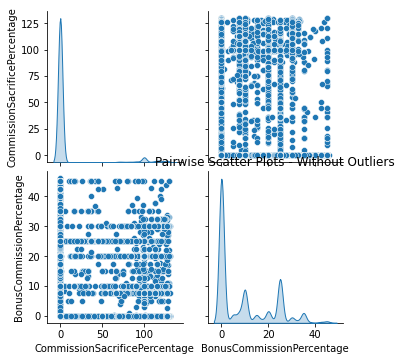

In [24]:
# Pairwise scatter plots without outliers
sns.pairplot(dataset_without_outliers[variables_of_interest], diag_kind='kde')
plt.title('Pairwise Scatter Plots - Without Outliers')
plt.show()

T-Tests

Perform a t-test to assess if the means of the two subsets (with outliers vs without outliers) differ significantly.

In [25]:
# Loop over each column
for column in numeric_columns:
    # Extract the specific field from the DataFrame
    data_with_outliers = df[column][df[column].notnull()]
    data_without_outliers = dataset_without_outliers[column][dataset_without_outliers[column].notnull()]
    
    # Perform t-test
    t_statistic, p_value = ttest_ind(data_with_outliers, data_without_outliers)
    
    # Print the results
    print(f"T-Test Results for {column}:")
    print(f"T-Statistic: {t_statistic}")
    print(f"P-Value: {p_value}")
    print()


T-Test Results for CommissionSacrificePercentage:
T-Statistic: 42.04531243786661
P-Value: 0.0

T-Test Results for BonusCommissionPercentage:
T-Statistic: 10.635878858175339
P-Value: 2.0506010001770503e-26



The T-test results indicate that the presence of outliers has a significant impact on both 'CommissionSacrificePercentage' and 'BonusCommissionPercentage'. The statistically significant differences in means between the datasets with and without outliers highlight the influence of outliers on the overall distribution and interpretation of the variables.

Overall, the presence of outliers affects the mean and std of the data. Outliers can also influence the relationships between variables, as seen in the correlation analysis. The t-test results confirm that the presence of outliers significantly impacts the statistical differences between the subsets.

#### Log Transformations

As the data is positively skewed and the outliers are primarily high values, a decision was made to attenmpt to apply a logarithmic transformation. The logarithmic transformation compresses the higher values and spreads out the lower values, reducing the impact of outliers. 

In [26]:
outlier_columns = ['CommissionSacrificePercentage', 'BonusCommissionPercentage']

df_log1p = df.copy()

for column in outlier_columns:
    df_log1p[column] = np.log1p(df_log1p[column])

In [27]:
numeric_data = df_log1p.select_dtypes(include=[np.number])

# Apply the function to each column of DataFrame
outliers = numeric_data.apply(detect_outliers_zscore)

In [28]:
# Count the number of outliers in each column
outlier_counts = outliers.count()

# Create a new DataFrame from outlier_counts
outlier_table = pd.DataFrame({'Column': outlier_counts.index, 'Outlier Count': outlier_counts.values})

# Display the table
print(outlier_table)

                          Column  Outlier Count
0  CommissionSacrificePercentage             32
1      BonusCommissionPercentage              0


#### Square-root transormation

In [29]:
df_sqrt = df.copy()

for column in outlier_columns:
    df_sqrt[column] = np.sqrt(df_sqrt[column])

numeric_data = df_sqrt.select_dtypes(include=[np.number])

# Apply the function to each column of DataFrame
outliers = numeric_data.apply(detect_outliers_zscore)

# Count the number of outliers in each column
outlier_counts = outliers.count()

# Create a new DataFrame from outlier_counts
outlier_table = pd.DataFrame({'Column': outlier_counts.index, 'Outlier Count': outlier_counts.values})

# Display the table
print(outlier_table)

                          Column  Outlier Count
0  CommissionSacrificePercentage           2984
1      BonusCommissionPercentage              0


#### Winsorize

In [30]:
outlier_columns = ['CommissionSacrificePercentage', 'BonusCommissionPercentage']

df_winsorize = df.copy()

for column in outlier_columns:
    # Winsorize the column at the 1st and 99th percentiles
    winsorized_values = winsorize(df_winsorize[column], limits=[0.01, 0.01])
    df_winsorize[column] = winsorized_values

numeric_data = df_winsorize.select_dtypes(include=[np.number])

# Apply the function to each column of DataFrame
outliers = numeric_data.apply(detect_outliers_zscore)

# Count the number of outliers in each column
outlier_counts = outliers.count()

# Create a new DataFrame from outlier_counts
outlier_table = pd.DataFrame({'Column': outlier_counts.index, 'Outlier Count': outlier_counts.values})

# Display the table
print(outlier_table)

                          Column  Outlier Count
0  CommissionSacrificePercentage           5988
1      BonusCommissionPercentage              0


In [31]:
outlier_columns = ['CommissionSacrificePercentage', 'BonusCommissionPercentage']

df_winsorize = df_log1p.copy()

for column in outlier_columns:
    # Winsorize the column at the 1st and 99th percentiles
    winsorized_values = winsorize(df_winsorize[column], limits=[0, 0.01])
    df_winsorize[column] = winsorized_values

numeric_data = df_winsorize.select_dtypes(include=[np.number])

# Apply the function to each column of DataFrame
outliers = numeric_data.apply(detect_outliers_zscore)

# Count the number of outliers in each column
outlier_counts = outliers.count()

# Create a new DataFrame from outlier_counts
outlier_table = pd.DataFrame({'Column': outlier_counts.index, 'Outlier Count': outlier_counts.values})

# Display the table
print(outlier_table)

                          Column  Outlier Count
0  CommissionSacrificePercentage              0
1      BonusCommissionPercentage              0


Based on the above, a decision was made to log transform both numeric variables, and then winsorize the log transformed CommissionSacrificePercentage field at the 99th percentile. This should have the effect of eliminating the outliers from the dataset.

In [32]:
# Apply logarithm to the specified columns
outlier_columns = ['CommissionSacrificePercentage', 'BonusCommissionPercentage']
for column in outlier_columns:
    df[column] = np.log1p(df[column])

# Winsorize the CommissionSacrificePercentage column at the 99th percentile
df['CommissionSacrificePercentage'] = winsorize(df['CommissionSacrificePercentage'], limits=[0, 0.01])

In [33]:
outliers = numeric_data.apply(detect_outliers_zscore)

In [34]:
outliers

,CommissionSacrificePercentage,BonusCommissionPercentage


In [35]:
numeric_data = df.select_dtypes(include=[np.number])

# Apply the function to each column of DataFrame
outliers = numeric_data.apply(detect_outliers_zscore)

# Count the number of outliers in each column
outlier_counts = outliers.count()

# Create a new DataFrame from outlier_counts
outlier_table = pd.DataFrame({'Column': outlier_counts.index, 'Outlier Count': outlier_counts.values})

# Display the table
print(outlier_table)

                          Column  Outlier Count
0  CommissionSacrificePercentage              0
1      BonusCommissionPercentage              0
